<a href="https://colab.research.google.com/github/ChunChong01234/Python-Projects/blob/Spam-Filter/Email_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
import os

folder_path_spam = '/content/drive/My Drive/Colab Notebooks/Spam/spam_2'  # Replace with your folder path
folder_path_nonspam = '/content/drive/My Drive/Colab Notebooks/NonSpam/easy_ham_2'  # Replace with your folder path

def get_file_list(folder_path):
  file_list = []
  if os.path.exists(folder_path):
    for filename in os.listdir(folder_path):
      file_path = os.path.join(folder_path, filename)
      file_list.append(file_path)
  else:
    print(f"Folder not found: {folder_path}")
  return file_list

In [28]:
def open_file(file_path):

  try:
    with open(file_path, 'r', encoding='latin') as f:
      content = f.read()
      return content
  except Exception as e:
    print(f"Error reading file {file_path}: {e}")
    return None
print((get_file_list(folder_path_spam)[0]))
open_file(get_file_list(folder_path_spam)[0]),


/content/drive/My Drive/Colab Notebooks/Spam/spam_2/00397.dc85d97361fbed3637f8db56d4c9c92d


('From esiroomkozucxfpo@netscape.net  Mon Jun 24 17:05:26 2002\nReturn-Path: esiroomkozucxfpo@netscape.net\nDelivery-Date: Tue May 21 02:47:01 2002\nReceived: from mandark.labs.netnoteinc.com ([213.105.180.140]) by\n    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g4L1kxe13289 for\n    <jm@jmason.org>; Tue, 21 May 2002 02:46:59 +0100\nReceived: from STEWART_SVR (mail.stewart-cpa.com [65.69.111.49]) by\n    mandark.labs.netnoteinc.com (8.11.2/8.11.2) with SMTP id g4L1kuD22983 for\n    <jm@netnoteinc.com>; Tue, 21 May 2002 02:46:57 +0100\nDate: Tue, 21 May 2002 02:46:57 +0100\nMessage-Id: <200205210146.g4L1kuD22983@mandark.labs.netnoteinc.com>\nReceived: from dosjp.netscape.net (user29.monson.k12.ma.us [216.20.81.29])\n    by STEWART_SVR; Sat, 04 May 2002 23:39:18 -0500\nFrom: esiroomkozucxfpo@netscape.net\nTo: yyyy@netnoteinc.com, jjadkins@knology.net, jparison@hotmail.com,\n    beelines72@yahoo.com, katro19@aol.com\nReply-To: altonlagana1248@swirve.com\nSubject: Re: We Pay your bi

In [29]:
import re
import pandas as pd
from collections import Counter

def clean_text(text):
    # Pre-compile regular expressions for efficiency
    html_tags = re.compile(r'(<.*?>)|(<[^>]*\n[^>]*>)')  # Remove HTML tags
    email_re = re.compile(r'([a-zA-Z\d.\-\#]+@[a-z.]+)|[a-zA-Z\d\.]+\.[a-z]{2,}')  # Remove email addresses and URLs
    symbols_re = re.compile(r'[^\w\s]|_')  # Remove all non-word characters
    single_chars_re = re.compile(r'\b\w\b')  # Remove single characters
    multiple_spaces_re = re.compile(r'\s+')  # Remove multiple spaces
    number = re.compile(r'\d+')  # Remove numbers

    # Step 1: Remove unwanted content
    content = re.sub(html_tags, '', text)  # Remove HTML tags
    content = re.sub(email_re, '', content)  # Remove emails/URLs
    content = re.sub(symbols_re, ' ', content)  # Replace special characters with space
    content = re.sub(number, '', content)  # Remove numbers
    content = re.sub(single_chars_re, ' ', content)  # Remove single characters
    content = re.sub(multiple_spaces_re, ' ', content)  # Reduce multiple spaces to single space

    return content

print(clean_text(open_file(get_file_list(folder_path_spam)[0])))


From Mon Jun Return Path Delivery Date Tue May Received from by with ESMTP id gLkxe for Tue May Received from STEWART SVR by with SMTP id gLkuD for Tue May Date Tue May Message Id Received from by STEWART SVR Sat May From To Reply To Subject Re We Pay your bills frh Mailer Microsoft Outlook IMO Build Keywords Content Type text html charset ISO Free Debt Consolidation Information Free Minute Debt Consolidation Quote Quickly and easily reduce Your Monthly Debt Payments Up To We are Non Profit Organization that has helped consolidate their debts into one easy affordable monthly payment For Free No Obligation quote to see how much money we can save you please read on Become Debt Free Get Your Life Back On Track All credit accepted and home ownership is NOT required Not Another Loan To Dig You Deeper In To Debt Confidential No Obligation Free Quote Free Debt Consolidation Quote If you have or more in debt trained professional will negotiate with your creditors to Lower your monthly debt pay

In [30]:
import re
import os

def check_pattern_in_file(file_path, pattern):
  try:
    with open(file_path, 'r', encoding='latin') as f:
      content = f.read()
      if re.search(pattern, content):
        return True  # Pattern found
      else:
        return False  # Pattern not found
  except Exception as e:
    print(f"Error reading file {file_path}: {e}")
    return False

# Get the list of files (using your existing get_file_list function)
all_files = get_file_list(folder_path_spam) + get_file_list(folder_path_nonspam)

# Define the regex pattern
pattern = r'([\s\S]*?From: .*)'

# Check each file
for file_path in all_files:
  if check_pattern_in_file(file_path, pattern):
    pass
  else:
    print(f"Pattern NOT found in: {file_path}")

In [43]:
import re
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import tqdm
import pandas as pd

print('Non Spam Folder')
content_nonspam = []
for file in tqdm.tqdm(get_file_list(folder_path_nonspam)):
  content = open_file(file)
  content = clean_text(content)
  content_nonspam.append(content)

vectorizer = TfidfVectorizer(min_df = 10)


tfidf_matrix = vectorizer.fit_transform(content_nonspam)
indexname = [file.lstrip('/content/drive/My Drive/Colab Notebooks/Spam/ham_2/')
             for file in get_file_list(folder_path_nonspam)]

df_tfidf_nonspam = pd.DataFrame(tfidf_matrix.toarray(), index=indexname, columns=vectorizer.get_feature_names_out())


print('Spam Folder')
content_spam = []
for file in tqdm.tqdm(get_file_list(folder_path_spam)):
  content = open_file(file)
  content = clean_text(content)
  content_spam.append(content)


vectorizer_spam = TfidfVectorizer(min_df=5)
tfidf_matrix_spam = vectorizer_spam.fit_transform(content_spam)


indexname_spam = [file.lstrip('/content/drive/My Drive/Colab Notebooks/Spam/spam_2/')
                   for file in get_file_list(folder_path_spam)]


df_tfidf_spam = pd.DataFrame(tfidf_matrix_spam.toarray(),
                             index=indexname_spam,
                             columns=vectorizer_spam.get_feature_names_out())



Non Spam Folder


100%|██████████| 1400/1400 [00:23<00:00, 60.86it/s] 


Spam Folder


100%|██████████| 1396/1396 [00:28<00:00, 49.14it/s] 


In [44]:
print(df_tfidf_spam.shape,df_tfidf_nonspam.shape)
df = pd.concat([df_tfidf_nonspam,df_tfidf_spam],axis=0)
df.fillna(0,inplace=True)
df['Spam/NotSpam'] = [0]*df_tfidf_nonspam.shape[0] + [1]*df_tfidf_spam.shape[0]
df.head()

(1396, 5475) (1400, 3006)


,aa,aaa,aac,ab,ability,able,about,above,abuse,ac,...,zip,zjncjwvyt,zmlszxmvdybgrrbmlmpwzybhbhqahrcdovldybvwcyywhvbyjbvzjvdxavemhl,zmlyzsjbvodbzlbpyzkvdgfpdfulmdpzibhbhqahrcdovlddyhbmdlbgzpcmuuyt,zxhlhbwwignoyxjzzxqymlnnsi,zyban,µã,µä,óð,Spam/NotSpam
00308.471343c72013f4df6a93a7cd51edaace,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
00733.8e51537a410ca42b33ae41f5973132d6,0.0,0.0,0.0,0.0,0.000000,0.0,0.020251,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
00949.c95efde29210bb5d7ffd820283ef2821,0.0,0.0,0.0,0.0,0.000000,0.0,0.054721,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
00929.2a34239559a12706a924bfabad41a5f6,0.0,0.0,0.0,0.0,0.000000,0.0,0.025603,0.0,0.067383,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
00915.5c8a9df80b70af9883deabbedb905d94,0.0,0.0,0.0,0.0,0.000000,0.0,0.016767,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00392.f494d12cb0d5daaead0e7f10f8afaef1,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.071786,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
00394.0e95ef1fe71d6bbf6867df86c862d15a,0.0,0.0,0.0,0.0,0.000000,0.0,0.056429,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
00395.74aee42fac915ca758047506ec59a21f,0.0,0.0,0.0,0.0,0.082615,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
00393.85c9cd10122736d443e69db6fce3ad3f,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [48]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size = 0.2,random_state = 42)
X_train = train.drop('Spam/NotSpam',axis = 1)
y_train = train['Spam/NotSpam']
X_test = test.drop('Spam/NotSpam',axis = 1)
y_test = test['Spam/NotSpam']

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

Multinomial_NB = MultinomialNB()
Multinomial_NB.fit(X_train,y_train)

Gaussian_NB = GaussianNB()
Gaussian_NB.fit(X_train,y_train)


GaussianNB()

In [50]:
Gaussian_NB.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy\n',accuracy_score(y_test,Gaussian_NB.predict(X_test)))
print('Confusion Mat \n',confusion_matrix(y_test,Gaussian_NB.predict(X_test)))

Accuracy
 0.9964285714285714
Confusion Mat 
 [[273   0]
 [  2 285]]


In [35]:
Multinomial_NB.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,Multinomial_NB.predict(X_test)),confusion_matrix(y_test,Multinomial_NB.predict(X_test))

(0.975,
 array([[289,   2],
        [ 12, 257]]))

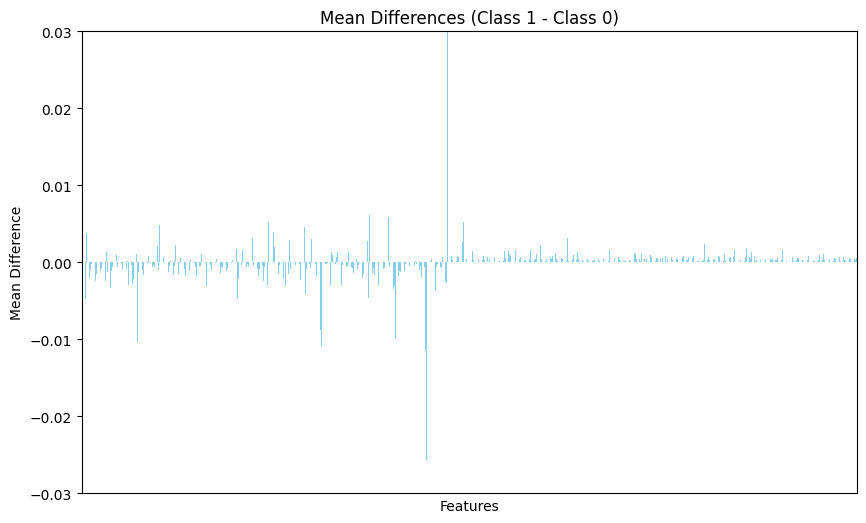

,Mean Class 0,Mean Class 1,Var Class 0,Var Class 1,Mean Difference
aa,0.001220,0.003750,9.222210e-05,6.304209e-04,0.002530
aaa,0.002113,0.000923,3.452472e-04,1.001994e-04,0.001190
aac,0.001185,0.000000,1.401915e-04,2.050883e-11,0.001185
ab,0.000779,0.002469,7.027454e-05,5.421014e-04,0.001690
ability,0.000942,0.001534,5.812745e-05,9.910742e-05,0.000592
...,...,...,...,...,...
zxhlhbwwignoyxjzzxqymlnnsi,0.000000,0.000571,2.050883e-11,7.379519e-05,0.000571
zyban,0.000000,0.000993,2.050883e-11,1.438720e-04,0.000993
µã,0.000000,0.000344,2.050883e-11,3.365486e-05,0.000344
µä,0.000000,0.000545,2.050883e-11,1.010009e-04,0.000545


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


feature_names = Gaussian_NB.feature_names_in_

means = Gaussian_NB.theta_
variances = Gaussian_NB.var_
class_means_df = pd.DataFrame(means, columns=feature_names, index=['Mean Class 0', 'Mean Class 1'])
class_variances_df = pd.DataFrame(variances, columns=feature_names, index=['Var Class 0', 'Var Class 1'])

summary_table = pd.concat([class_means_df, class_variances_df], axis=0)
summary_table = summary_table.T
summary_table['Mean Difference'] = (summary_table['Mean Class 1'] - summary_table['Mean Class 0'])


plt.figure(figsize=(10, 6))
summary_table['Mean Difference'].plot(kind='bar', color='skyblue', title='Mean Differences (Class 1 - Class 0)')
plt.ylabel('Mean Difference')
plt.xlabel('Features')
plt.xticks([])
plt.ylim(-0.03, 0.03)
plt.show()

summary_table['Mean Difference'] = abs(summary_table['Mean Class 1'] - summary_table['Mean Class 0'])

summary_table

In [77]:
feature_importance = pd.DataFrame(Multinomial_NB.feature_log_prob_, columns=  Multinomial_NB.feature_names_in_)

feature_importance = feature_importance.T
feature_importance['spam - non-spam'] = feature_importance[1] - feature_importance[0]
feature_importance.sort_values(by='spam - non-spam',ascending=False,inplace=True)
feature_importance.head(20)

,0,1,spam - non-spam
jun,-9.736680,-6.105020,3.631660
nbsp,-8.534753,-5.118858,3.415895
insurance,-9.736680,-6.778984,2.957695
keywords,-9.736680,-6.951550,2.785129
click,-9.109183,-6.355023,2.754159
mortgage,-9.736680,-7.002466,2.734214
quot,-9.736680,-7.044773,2.691907
credit,-9.354726,-6.673326,2.681400
rates,-9.736680,-7.073657,2.663023
sightings,-9.736680,-7.335106,2.401574
